<center><h1> Stack OverFlow Developer Survey 2018 Analysis</h1></center>

By : Karishma Visrodia , Ritu Ranjani Ravi Shankar, Tanmayi Varanasi

## OVERVIEW

* Each year, stackoverflow asks the developer community about everything from their favorite technologies to their job preferences. Over 100,000 developers participated in this survey from 183 countries.


* This survey captures how developers learn, which tools they use, future goals etc


* This dataset captures interesting metrics like salary, programming languages used, job satisfaction levels and others which can be used to analyse and derive insights into the software industry.


* Using this dataset we can see the current trends in the industry and make educated predictions about the direction in which it is headed.


* The purpose of this analysis is to discover findings from this dataset that are not apparent or obvious.




## Who is this for?

* This analysis can be used by Companies to identify the most languages worked with, or based on the country, how is their job situations, salaries etc. 

### Packages used in this analysis

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
import random

%matplotlib inline
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#import missingno as msno
import pycountry

from collections import Counter
from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np
from bisect import bisect_left
from collections import Counter, OrderedDict
from itertools import accumulate
from pathlib import Path
from matplotlib import cm
from plotSlope import slope

In [2]:
%autosave 10

Autosaving every 10 seconds


In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading the CSV file

In [4]:
df_survey = pd.read_csv("survey_results_public.csv", index_col=0)

In [5]:
df1 = df_survey

## Data overview

In this section, we check the dimensions and summary of the data. 

#### Shape

In [6]:
print('The dataset contains', np.shape(df1)[0], 'rows and', np.shape(df1)[1], 'columns.')

The dataset contains 98855 rows and 128 columns.


#### Head

In [7]:
df1.head(1)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy


#### Summary

In [8]:
# Summary of the dataframe
df1.describe()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [9]:
df1.describe(include=['O'])

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
count,98855,98855,98443,94901,95321,94703,79036,71531,92098,93835,...,72108,64469,59765,61813,57473,64574,62596,15781,65941,65879
unique,2,2,183,3,6,9,12,8,9568,11,...,4,15,14,9,71,7,2,2,3,5
top,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer,3-5 years,...,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,25 - 34 years old,No,No,The survey was an appropriate length,Somewhat easy
freq,79897,55769,20309,70399,70495,43659,50336,16996,6417,23313,...,26995,59458,55013,18090,40541,31759,44478,15043,33257,24434


#### Memory usage

In [10]:
df1.memory_usage(index=True).sum()

102018360

#### Unique values in each column

In [11]:
# checking the number of unique values of each column
for c in df1.columns:
    print(c + ' ' + str(df1[c].nunique()) )

Hobby 2
OpenSource 2
Country 183
Student 3
Employment 6
FormalEducation 9
UndergradMajor 12
CompanySize 8
DevType 9568
YearsCoding 11
YearsCodingProf 11
JobSatisfaction 7
CareerSatisfaction 7
HopeFiveYears 7
JobSearchStatus 3
LastNewJob 5
AssessJob1 10
AssessJob2 10
AssessJob3 10
AssessJob4 10
AssessJob5 10
AssessJob6 10
AssessJob7 10
AssessJob8 10
AssessJob9 10
AssessJob10 10
AssessBenefits1 11
AssessBenefits2 11
AssessBenefits3 11
AssessBenefits4 11
AssessBenefits5 11
AssessBenefits6 11
AssessBenefits7 11
AssessBenefits8 11
AssessBenefits9 11
AssessBenefits10 11
AssessBenefits11 11
JobContactPriorities1 5
JobContactPriorities2 5
JobContactPriorities3 5
JobContactPriorities4 5
JobContactPriorities5 5
JobEmailPriorities1 7
JobEmailPriorities2 7
JobEmailPriorities3 7
JobEmailPriorities4 7
JobEmailPriorities5 7
JobEmailPriorities6 7
JobEmailPriorities7 7
UpdateCV 8
Currency 19
Salary 3998
SalaryType 3
ConvertedSalary 7473
CurrencySymbol 112
CommunicationTools 1149
TimeFullyProductive 6
E

#### Datatypes of each column

In [12]:
# checking the Datatypes of each column
for c in df1.columns:
    print(c + ' = ' + str(df1[c].dtypes))

Hobby = object
OpenSource = object
Country = object
Student = object
Employment = object
FormalEducation = object
UndergradMajor = object
CompanySize = object
DevType = object
YearsCoding = object
YearsCodingProf = object
JobSatisfaction = object
CareerSatisfaction = object
HopeFiveYears = object
JobSearchStatus = object
LastNewJob = object
AssessJob1 = float64
AssessJob2 = float64
AssessJob3 = float64
AssessJob4 = float64
AssessJob5 = float64
AssessJob6 = float64
AssessJob7 = float64
AssessJob8 = float64
AssessJob9 = float64
AssessJob10 = float64
AssessBenefits1 = float64
AssessBenefits2 = float64
AssessBenefits3 = float64
AssessBenefits4 = float64
AssessBenefits5 = float64
AssessBenefits6 = float64
AssessBenefits7 = float64
AssessBenefits8 = float64
AssessBenefits9 = float64
AssessBenefits10 = float64
AssessBenefits11 = float64
JobContactPriorities1 = float64
JobContactPriorities2 = float64
JobContactPriorities3 = float64
JobContactPriorities4 = float64
JobContactPriorities5 = float6

<center> <h2> Data Preprocessing and Cleaning </h2> </center>

### Why is it important to clean the dataset?

* It helps filter, modify the data such that it is easier explore, understand, and model.

* Without clean data, it is hard to see the actual important parts during data exploration.

* Incorrect or inconsistent data leads to false conclusions. 


#### Checking the number of NaN's in each column

In [13]:
for c in df1.columns:
    print(c + ' = ' + str(df1[c].isna().sum()))

Hobby = 0
OpenSource = 0
Country = 412
Student = 3954
Employment = 3534
FormalEducation = 4152
UndergradMajor = 19819
CompanySize = 27324
DevType = 6757
YearsCoding = 5020
YearsCodingProf = 20952
JobSatisfaction = 29579
CareerSatisfaction = 22351
HopeFiveYears = 23137
JobSearchStatus = 19367
LastNewJob = 19966
AssessJob1 = 31870
AssessJob2 = 31870
AssessJob3 = 31870
AssessJob4 = 31870
AssessJob5 = 31870
AssessJob6 = 31870
AssessJob7 = 31870
AssessJob8 = 31870
AssessJob9 = 31870
AssessJob10 = 31870
AssessBenefits1 = 33937
AssessBenefits2 = 33937
AssessBenefits3 = 33937
AssessBenefits4 = 33937
AssessBenefits5 = 33937
AssessBenefits6 = 33937
AssessBenefits7 = 33937
AssessBenefits8 = 33937
AssessBenefits9 = 33937
AssessBenefits10 = 33937
AssessBenefits11 = 33938
JobContactPriorities1 = 50149
JobContactPriorities2 = 50149
JobContactPriorities3 = 50149
JobContactPriorities4 = 50149
JobContactPriorities5 = 50149
JobEmailPriorities1 = 52642
JobEmailPriorities2 = 52642
JobEmailPriorities3 = 526

**Note**: We are changing **NaN's** in all the columns to **'Not_Answered'**

### 1. Gender

Gender column has 15 categories. For simplicity, we are classifying the gender other than **male/female** into **others**.

In [14]:
df1.Gender.unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [15]:
# Filling NaN with "Not_Answered"
df1.Gender.fillna(value = "Not_Answered", inplace = True)

In [16]:
# Creating a new column 'Gender_modified' with the new categories
df1['Gender_modified'] = df1['Gender'].apply(lambda x: 'Male' if x == 'Male'\
                                                    else 'Female' if x == 'Female'\
                                                        else 'Others' if ((x != 'Male')&(x!='Female')&(x!='Not_Answered'))
                                                                    else 'Not_Answered') 

In [17]:
#Showing the count for verification
df1.Gender_modified.value_counts()

Male            59458
Not_Answered    34386
Female           4025
Others            986
Name: Gender_modified, dtype: int64

### 2. Sexual Orientation

Sexual Orientation column has 14 categories. For simplicity, we are classifying the Sexual Orientation other than **straight/heterosexual** into **LGBTQ**

In [18]:
df1.SexualOrientation.unique()

array(['Straight or heterosexual', nan, 'Bisexual or Queer', 'Asexual',
       'Gay or Lesbian', 'Straight or heterosexual;Bisexual or Queer',
       'Straight or heterosexual;Asexual',
       'Gay or Lesbian;Bisexual or Queer',
       'Straight or heterosexual;Gay or Lesbian;Bisexual or Queer',
       'Bisexual or Queer;Asexual',
       'Straight or heterosexual;Gay or Lesbian;Bisexual or Queer;Asexual',
       'Straight or heterosexual;Gay or Lesbian',
       'Straight or heterosexual;Bisexual or Queer;Asexual',
       'Gay or Lesbian;Asexual',
       'Gay or Lesbian;Bisexual or Queer;Asexual'], dtype=object)

In [19]:
# Filling NaN with "Not_Answered"
df1.SexualOrientation.fillna(value = 'Not_Answered', inplace = True)

In [20]:
# Creating a new column 'Sexualorientation_modified' with the new categories
df1['Sexualorientation_modified'] = df1['SexualOrientation'].apply(lambda x: 'Straight' if x == 'Straight or heterosexual'\
                                            else 'Not_Answered' if x == 'Not_Answered'\
                                                else 'LGBTQ')

### 3. Mode Impute Student

Values ‘No’ in ‘Student’ column is thrice as compared to that of the other values. Therefore, performing mode impute on this column.

In [21]:
df1.Student.value_counts()

No                70399
Yes, full-time    18394
Yes, part-time     6108
Name: Student, dtype: int64

In [22]:
df1.Student.fillna(value="No",inplace = True)

### 4. Mode Impute Employment and modifying column values

Values ‘Employed full-time’ in 'Employment' column is thrice as compared to that of the other values. Therefore, performing mode impute on this column.

In [23]:
df1.Employment.value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

In [24]:
# Filling NaN with "Not_Answered"
df1.Employment.fillna(value="Employed full-time",inplace = True)

In [25]:
# Creating a new column 'Employement_modified' with the new categories
df1['Employement_modified'] = df1.Employment.apply(lambda x: 'Full-time' if (x == 'Employed full-time') \
                            else 'Part-time' if (x == 'Employed part-time') \
                            else 'Self-employed' if(x == 'Independent contractor, freelancer, or self-employed')
                            else 'Not employed: Looking for work' if(x == 'Not employed, but looking for work')\
                            else 'Not employed: Not looking for work' if(x == 'Not employed, and not looking for work')\
                            else 'Retired' if(x == 'Retired')\
                            else 'Not_Answered')

### 5. Formal Education

Simplifying the values in 'FormalEducation' column for easy readability

In [26]:
df1['FormalEducation_modified'] = df1['FormalEducation'].apply(lambda x: 'Bachelors'
                if x == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'\
                    else 'Masters' if x == "Master’s degree (MA, MS, M.Eng., MBA, etc.)"\
                        else 'Professional' if x == 'Professional degree (JD, MD, etc.)'\
                          else 'Associate' if x == 'Associate degree' \
                             else 'Doctorate' if x == 'Other doctoral degree (Ph.D, Ed.D., etc.)'\
                                else 'No Degree'\
                                if ((x == 'Some college/university study without earning a degree')\
                     | (x == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                     | (x == 'Primary/elementary school')\
                     | (x == 'I never completed any formal education'))\
                                    else 'Not_Answered')                           

In [27]:
df1[['FormalEducation','FormalEducation_modified']].head()

,FormalEducation,FormalEducation_modified
Respondent,,
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Bachelors
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Bachelors
4,Associate degree,Associate
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Bachelors
7,Some college/university study without earning ...,No Degree


### 6. UnderGrad Major

Simplifying the values in 'UndergradMajor' column for easy readability

In [28]:
df1['UndergradMajor_modified'] = df1['UndergradMajor'].apply(lambda x: 'Statistics'
if x == 'Mathematics or statistics'\
  else 'Science' if x == "A natural science (ex. biology, chemistry, physics)"\
    else 'Computer Science' if x == 'Computer science, computer engineering, or software engineering'\
      else 'Arts' if x == 'Fine arts or performing arts (ex. graphic design, music, studio art)' \
        else 'IT' if x == 'Information systems, information technology, or system administration'\
         else 'Business' if x == 'A business discipline (ex. accounting, finance, marketing)'\
           else 'Social Science' if x == 'A social science (ex. anthropology, psychology, political science)'\
            else 'Engineering' if x == 'Another engineering discipline (ex. civil, electrical, mechanical)'\
               else 'Web Development' if x == 'Web development or web design'\
                 else 'Humanities' if x == 'A humanities discipline (ex. literature, history, philosophy)'\
                   else 'Health Science' if x == 'A health science (ex. nursing, pharmacy, radiology)'\
                     else 'Not_Answered')

In [29]:
df1.UndergradMajor_modified.value_counts()

Computer Science    50336
Not_Answered        20512
Engineering          6945
IT                   6507
Science              3050
Statistics           2818
Web Development      2418
Business             1921
Humanities           1590
Social Science       1377
Arts                 1135
Health Science        246
Name: UndergradMajor_modified, dtype: int64

### 7. Race Ethinicity

Simplifying the values in 'RaceEthnicity' column for easy readability

In [30]:
# Splitting the RaceEthnicity column based on semicolon
df1['Race_new'] = df1.RaceEthnicity.str.split(";",expand=True,)[0]

In [31]:
# Filling NaN with "Not_Answered"
df1.Race_new.fillna(value = "Not_Answered", inplace = True)

In [32]:
df1['Race_new'] = df1['Race_new'].apply(lambda x: 'Blacks'
if x == 'Black or of African descent'\
  else 'White' if x == "White or of European descent"\
    else 'Latina' if x == 'Hispanic or Latino/Latina'\
      else 'Asian' if ((x == 'South Asian') | (x == 'East Asian')) \
        else 'Mid East' if x == 'Middle Eastern'\
         else 'Native American' if x == 'Native American, Pacific Islander, or Indigenous Australian'
            else 'Not_Answered')

### 8. Years Coding Professionally

We have classified 'YearsCodingProf' into 6 buckets, each with 5 year interval.

In [33]:
df1['YearsCodingProf_modified'] = df1.YearsCodingProf.apply(lambda x: '0-5 years' if (x == '0-2 years') | (x == '3-5 years')\
                                                   else '6-11 years' if (x == '6-8 years') | (x == '9-11 years')\
                                                   else '12-17 years' if (x == '12-14 years') | (x == '15-17 years')\
                                                   else '18-23 years' if (x == '18-20 years') | (x == '21-23 years')\
                                                   else '24-29 years' if (x == '24-26 years') | (x == '27-29 years')\
                                                   else '30 or more years' if (x == '30 or more years')\
                                                   else 'Not_Answered')

In [34]:
df1.YearsCodingProf_modified.value_counts()

0-5 years           44783
Not_Answered        20952
6-11 years          18958
12-17 years          7299
18-23 years          4198
24-29 years          1363
30 or more years     1302
Name: YearsCodingProf_modified, dtype: int64

### 9. Age

In [35]:
# Filling NaN with "Not_Answered"
df1.Age.fillna(value = 'Not_Answered',inplace = True)

### 10. HoursComputer

In [36]:
# Filling NaN with "Not_Answered"
df1.HoursComputer.fillna(value = 'Not_Answered',inplace = True)

### 11. Dropping Columns containing more than 52% NaNs.

In [37]:
for c in df1.columns:
    print(c + ' = ' + str(df1[c].isna().sum()))

Hobby = 0
OpenSource = 0
Country = 412
Student = 0
Employment = 0
FormalEducation = 4152
UndergradMajor = 19819
CompanySize = 27324
DevType = 6757
YearsCoding = 5020
YearsCodingProf = 20952
JobSatisfaction = 29579
CareerSatisfaction = 22351
HopeFiveYears = 23137
JobSearchStatus = 19367
LastNewJob = 19966
AssessJob1 = 31870
AssessJob2 = 31870
AssessJob3 = 31870
AssessJob4 = 31870
AssessJob5 = 31870
AssessJob6 = 31870
AssessJob7 = 31870
AssessJob8 = 31870
AssessJob9 = 31870
AssessJob10 = 31870
AssessBenefits1 = 33937
AssessBenefits2 = 33937
AssessBenefits3 = 33937
AssessBenefits4 = 33937
AssessBenefits5 = 33937
AssessBenefits6 = 33937
AssessBenefits7 = 33937
AssessBenefits8 = 33937
AssessBenefits9 = 33937
AssessBenefits10 = 33937
AssessBenefits11 = 33938
JobContactPriorities1 = 50149
JobContactPriorities2 = 50149
JobContactPriorities3 = 50149
JobContactPriorities4 = 50149
JobContactPriorities5 = 50149
JobEmailPriorities1 = 52642
JobEmailPriorities2 = 52642
JobEmailPriorities3 = 52642
Job

### Creating a new dataframe with the columns required for analysis

In [38]:
df = df1[['Country','Student','CompanySize', 'DevType', 'YearsCoding', 'JobSatisfaction','CareerSatisfaction',
 'Currency','Salary','SalaryType','ConvertedSalary','CurrencySymbol','EducationTypes','SelfTaughtTypes',
 'LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith',
 'PlatformDesireNextYear','IDE','OperatingSystem', 'AIDangerous','AIInteresting','AIResponsible',
 'AIFuture','StackOverflowRecommend','StackOverflowVisit','StackOverflowHasAccount','StackOverflowParticipate',
 'StackOverflowJobs','StackOverflowDevStory','StackOverflowJobsRecommend','StackOverflowConsiderMember',
 'HypotheticalTools1','HypotheticalTools2','HypotheticalTools3','HypotheticalTools4','HypotheticalTools5',
 'HoursComputer', 'HoursOutside','RaceEthnicity','Age','Dependents','MilitaryUS', 
 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3','AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
 'AssessBenefits7','AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11','Gender_modified',
 'Sexualorientation_modified', 'Employement_modified','FormalEducation_modified','UndergradMajor_modified',
 'Race_new','YearsCodingProf_modified']]


In [39]:
df = df.rename(columns = {'AssessBenefits1':'Salary/Bonuses',
                              'AssessBenefits2':'Stock Options',
                              'AssessBenefits3':'Health Insurance',\
                              'AssessBenefits4':'Parental Leave',
                              'AssessBenefits5':'Fitness/Wellness Benefit',
                              'AssessBenefits6':'Retirement/Pension Savings',\
                              'AssessBenefits7':'Meal/Snacks',\
                              'AssessBenefits8':'Computer/Office Equipment Benefit',
                              'AssessBenefits9':'Childcare Benefit',
                              'AssessBenefits10':'Transportation Benefit',\
                              'AssessBenefits11':'Conference/Education Benefit',
                              'Sexualorientation_modified':'SexualOrientation',
                              'Employement_modified':'Employement',
                              'FormalEducation_modified':'FormalEducation',
                              'UndergradMajor_modified':'UndergradMajor',
                              'Race_new':'Race',
                              'YearsCodingProf_modified':'YearsCodingProf',
                              'Gender_modified':'Gender'
                              })

### Defining functions required in the analysis

#### 1.  Plotly Graphs Function

In [40]:
def bar_horizontal_plot(choice_type, question, width=800, height=800, left=600):
    if choice_type == 'multiple':
        temp1 = pd.DataFrame(df[question].dropna().str.split(';').tolist()).stack()
        cnt_srs = temp1.value_counts()
    else:
        cnt_srs = df[question].value_counts().head(20)
    
    trace = go.Bar(
        y = cnt_srs.index[::-1],
        x = cnt_srs.values[::-1],
        text=['{:.1f}%'.format(percent) for percent in (100 * cnt_srs / cnt_srs.sum())[::-1]], 
        textposition = 'auto',
        textfont=dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        orientation = 'h',
        marker = dict(
            color = random_color_generator(30),
            line=dict(color='rgb(8,48,107)',
              width=1.5,)
        ),
        opacity = 0.7,
    )

    layout = dict(
        title = question,
        titlefont = dict(
            size=15
        ),
        margin = dict(
            l = left
        ),
        xaxis=dict(
            title = 'Count',
            tickfont=dict(
                size=12,
            )
        ),
        yaxis=dict(
            tickfont=dict(
                size=12,
            )
        ),
        width = width,
        height = height,
    )

    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
    
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

#### 2. Function to calculate summary of columns ( LanguagesWorkedWith & DevType)

In [41]:
def calc_summary(series, sep=';', labeled_ratio=0.9):
    '''Generate stats summary data for a series.'''
    count_dict = Counter(
        ide for ides in series.str.split(sep)
            if isinstance(ides, list)
            for ide in ides
    )
    count = count_dict.most_common()

    labeled_total_count = sum(x[1] for x in count) * labeled_ratio
    accumulated_counts = list(accumulate(x[1] for x in count))
    index = bisect_left(accumulated_counts, labeled_total_count)
    
    count_tops, count_others = count[:index], count[index:]
    count_tops.append(('others', sum(x[1] for x in count_others)))
    
    return count_tops

#### 3. Function to prepare horizontal bar chart

In [42]:
def prepare_bar_horizontal(count_summary, total, ratio_margin=None):
    labels, values = zip(*count_summary)
    indices = np.arange(len(labels))

    fig, ax = plt.subplots()
    ax.barh(indices, values)

    # Set settings related to y-axis.
    ax.set_yticks(indices)
    ax.set_yticklabels(labels)

    # Sort rows by the original order.
    ax.invert_yaxis()
    
    # Set max value to the total count.
    plt.xlim(0, total)
    
    # Add percentage labels.
    if not ratio_margin:
        ratio_margin = total / 50
    for i, v in zip(indices, values):
        ax.text(min(total, v) + ratio_margin, i + 0.2, '{:2.0f}%'.format(v / total * 100))

#### 4. Function to display overall response

In [43]:
def response_overall(feature, normalize=True):
    '''
    Gives the overall response stats for `feature` in different countries.
    :param feature: String storing the column name whose overall description is
        required
    
    Returns: A pandas.DataFrame object with unique feature values as the columns
        and countries as the index
    '''
    survey_df = pd.DataFrame(columns=df[feature].value_counts().index)
    survey_df.loc['World', :] = df[feature].value_counts(normalize=normalize) * 100
    survey_df.loc['India', :] = survey_df_india[feature].value_counts(normalize=normalize) * 100
    survey_df.loc['US', :] = survey_df_us[feature].value_counts(normalize=normalize) * 100
    survey_df.loc['UK', :] = survey_df_uk[feature].value_counts(normalize=normalize) * 100
    survey_df.loc['Germany', :] = survey_df_germany[feature].value_counts(normalize=normalize) * 100
    return survey_df

#### 5. Function to generate stacked bar plot

In [44]:
def plot_sequential(df2, feature, order=None, colormap=cm.magma, horizontal=False):
    '''
    Function to plot feature with sequential feature values.
    :param df: Pandas.DataFrame object containing values to be plotted
        [likely one returned from response_overall()]
    :param feature: The feature name that is being plotted
    :param order: The order in which we want to plot the feature values
    :param colormap: matplotlib.cm object that provides the colormap for plotting
    :param horizontal: Boolean specifying the orientation of the barplot
    
    Returns the plotted axis
    '''
    if order is None:
        order = list(df2.columns)
    country_order = ['World', 'India', 'US', 'UK', 'Germany']
    title = 'Years coding Professionally'
    if horizontal:
        ax = df2.loc[country_order[::-1], order] \
                .plot.barh(figsize=(16, 8), stacked=True, colormap=colormap)
        ax.set_xlabel("Percentage", fontdict={'size':16});
        ax.set_xlim(0, 100)
        ax.set_ylabel("Responses", fontdict={'size':16});
        ax.set_title(title, fontdict={'weight': 'bold'});
        sns.despine()
        return ax
    else:
        ax = df2.loc[country_order, order] \
                .plot.bar(figsize=(16, 8), stacked=True, colormap=colormap)
        ax.set_ylabel("Percentage", fontdict={'size':16});
        ax.set_xlabel("Responses", fontdict={'size':16});
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_title(title, fontdict={'weight': 'bold'});
        sns.despine(bottom=True);
        return ax

#### 6. Function to highlight row with minimum value

In [45]:
def highlight_min(s):    
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [46]:
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

<center> <h2> Data Exploration </h2></center>

### 1.1 Demographic Analysis

#### Gender

In [47]:
bar_horizontal_plot(choice_type='multiple', question='Gender', width=800, height=400, left=400)

<div class="alert alert-block alert-info"> In this survey, <b>60%</b> of the responders are <b>Male</b> and only <b>4%</b> of them are <b>Female</b>.</div>

#### Sexual Orientation

In [48]:
bar_horizontal_plot(choice_type='multiple', question='SexualOrientation', width=800, height=400, left=400)

<div class="alert alert-block alert-info"> In this survey, <b>55.7%</b> of the responders have declared themselves as <b>Straight</b> and almost <b>40%</b> of them have chosen not to disclose their identity.</div>


#### Age

In [49]:
bar_horizontal_plot(choice_type='multiple', question='Age', width=800, height=400, left=400)

<div class="alert alert-block alert-info"> In this survey, almost <b>49%</b> of the responders belong to <b>18 - 34 year</b> age range.</div>

#### Race

In [50]:
bar_horizontal_plot(choice_type='multiple', question='Race', width=800, height=400, left=400)

<div class="alert alert-block alert-info">From the above graph, <b>41%</b> of the responders are White and almost <b>42%</b> of the people chose not to disclose their race.</div>

### 1.2 Education Analysis

In [51]:
bar_horizontal_plot(choice_type='single', question='FormalEducation', width=800, height=400, left=300)

<div class="alert alert-block alert-info">From the above graph, <b>44.2%</b> of the responders have a formal education in <b>Bachelor's</b> degree.</div>

In [52]:
bar_horizontal_plot(choice_type='single', question='UndergradMajor', width=800, height=500, left=300)

<div class="alert alert-block alert-info">From the above graph, <b>51%</b> of the responders hold a <b>Major</b> in <b>Computer Science</b>.</div>

### 1.3 Geographical Analysis

### Interactive Plotly graph showing countries where repsondents belong

In [53]:
countries = df['Country'].value_counts()
countries = countries.to_frame().reset_index()
mapping = {country.name: country.alpha_3 for country in pycountry.countries}

for i, country in enumerate(countries['index']):
    temp_country = country
    countries.loc[i, 'code'] = mapping.get(temp_country)
    
data = [dict(
    type = 'choropleth',
    locations = countries['code'],
    z = countries['Country'],
    text = countries['index'],
    colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale = True,
    marker = dict(
        line = dict(
            color = 'rgb(180, 180, 180)',
            width =0.5
        )
    ),
    colorbar = dict(
        autotick = False,
        tickprefix = '',
        title = 'Total Count',
    )
)]

layout = dict(
    title = 'countries which responded to the survey',
    height = 800,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

Hover over the map to see from which countries are the respondents from.

<div class="alert alert-block alert-info"> We see that, Countries- <b>US, UK, India, Germany</b> are the </b>top 4</b> countries with the maximum number of responders.</div>

### 1.4 Experience Analysis

### Work Experience of the Responders

#### 1.4.1 The number of years the responders spent coding

In [54]:
bar_horizontal_plot(choice_type='single', question='YearsCoding', width=800, height=500, left=300)

<div class="alert alert-block alert-info">In the graph above, alomst <b>50%</b> of the responders have <b>3 - 8 years</b> of coding experience. </div>

#### 1.4.2 The number of years the responders spent coding professionally

In [55]:
bar_horizontal_plot(choice_type='single', question='YearsCodingProf', width=800, height=500, left=300)

<div class="alert alert-block alert-info"> In the graph above, <b>45%</b> of the responders have <b>0 - 5 years</b> of coding experience professionally. </div>

### 1.5 Languages Worked with

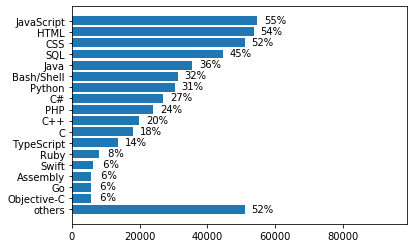

In [56]:
data_lang = df['LanguageWorkedWith']
prepare_bar_horizontal(calc_summary(data_lang), len(data_lang))
plt.show()

<div class="alert alert-block alert-info">We can see that the most used languages are <b>JavaScript, HTML, CSS, SQL and Java</b> </div>

### 1.6 Developer Type

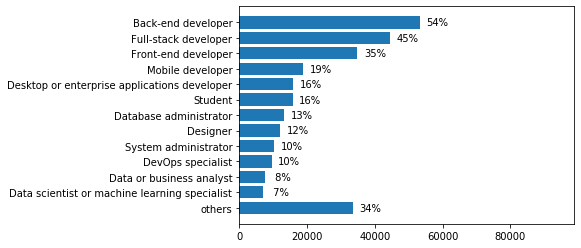

In [57]:
data_dev = df['DevType']
prepare_bar_horizontal(calc_summary(data_dev), len(data_dev))
plt.show()

<div class="alert alert-block alert-info">Almost <b>55%</b> of respondents identify as <b>back-end developers</b></div>

<center> <h2> Findings </h2> </center>

#### Now that we have done the basic exploration of the dataset, let's look at some interesting findings we encountered.

In [58]:
# Creating a dataframe with Countries and their respective counts
countries = (df.groupby('Country').agg({'Country':'count'})\
                                 .rename(columns = {'Country':'count'})\
                                 .sort_values('count', ascending = False)).head(4)

countries.reset_index(inplace = True)

In [59]:
print("\nThis pie chart shows the top 4 countries")
colors = ['gold', 'mediumturquoise', 'orange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=countries['Country'], values=countries['count'], \
                             pull=[0.08, 0.08, 0, 0], \
                             marker=dict(colors=colors), \
                             hoverinfo='label',\
                             textinfo='value', \
                             title="Top 4 countries with most contribution")])
fig.show()


This pie chart shows the top 4 countries


<div class="alert alert-block alert-info">  The majority of the repondents come from <b>United States, United Kingdom, India and Germany</b>. Therefore, we are using these countries for further analysis. </div>

 **Note**  : The percentage displayed in the Pie-Chart is with respect to the Top-4 countries and not the entire dataset. 

### Finding 1: India contains a large pool of younger developer talent

The responders of this survey have recorded the number of years they coded(not coding professionally), and the number of years they coded as part of their job.

We are interested in finding out, among the Top-4 countries from this survey, which country has the maximum responders based on the years of coding experience for professional reasons. 

The years of coding experience is the groups of **0-5 years,6-11 years,12-17 years,18-23 years,24-29 years,30 or more years**

The below line of code is subsetting the countries into seperate dataframes for India,Germany,US,UK.

In [60]:
survey_df_india = df.loc[df['Country']=='India', :].copy(deep=True)
survey_df_germany = df.loc[df['Country']=='Germany', :].copy(deep=True)
survey_df_uk = df.loc[df['Country']=='United Kingdom', :].copy(deep=True)
survey_df_us = df.loc[df['Country']=='United States', :].copy(deep=True)

Calling the function defined above- "response_overall" to calculate the unique count of respondents based on the years of professional coding experience.

In [61]:
years_coding_prof_df = response_overall('YearsCodingProf')
years_coding_prof_df.columns.name = 'Years Coding Professionally'
years_coding_prof_df.index.name = 'Country'

years_coding_prof_df.style.apply(highlight_max)

Years Coding Professionally,0-5 years,Not_Answered,6-11 years,12-17 years,18-23 years,24-29 years,30 or more years
Country,,,,,,,
World,45.3017,21.1947,19.1776,7.38354,4.24662,1.37879,1.31708
India,55.9507,28.839,12.8198,1.80016,0.378981,0.0874572,0.123898
US,40.8243,14.8062,21.2221,10.163,7.46959,2.58998,2.92481
UK,39.1577,15.2066,22.424,10.127,7.7801,2.76483,2.53978
Germany,43.66,19.6625,21.1178,8.96424,4.02539,1.43985,1.13021


### Analysis: 
<div class="alert alert-block alert-info"> From the above table we see that, 
    <ol> 1) India has the largest percentage of less experienced <b>(0-5 years)</b> developers coding professionally <b>(56%)</b>, whereas the same share is lesser in the US, UK, Germany and the rest of the world <b>(~40%).</b> </ol>
    <ol> 2) Most of the developers with <b>12+ years</b> of professional coding experience in India are less than <b>1%</b> compared to the rest of the respondent countries. </ol>
    <ol> 3) The technology boom in India might have not started until the 2000s or even earlier, hence there is a significant gap in the developers with experience greater than 12 years.</ol>
    </div>

### Validating the finding through visualization

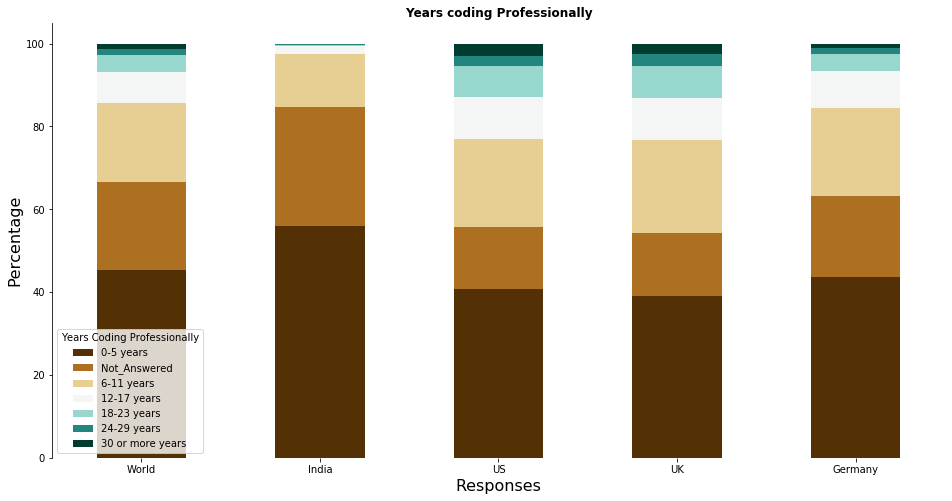

In [62]:
# calling the plot_sequential function to plot generate a stacked plot
plot_sequential(df2=years_coding_prof_df, feature='YearsCodingProf',colormap=cm.BrBG);

# Creating a dictonary to display labels for the graph
country_df_dict = {'World': df, 'India': survey_df_india, 'US': survey_df_us,
                   'UK': survey_df_uk, 'Germany': survey_df_germany}

The above graph, shows the years of coding experience of the developers in each category as a stack bar plot, for the Top 4 countries. 

We see that, India has the higher percentage of repsondents who have coded professionally in the range of 0-5 years.

##### Managerial Insight

<div class="alert alert-block alert-info"> This finding shows that the entry level jobs in India are highly crowded and there is more competition between developers. This could result in a large resource pool for the companies to hire.</div>

### Finding 2: Median salary in India is less compared to US, UK and Germany

Now that we know the number of people at entry level are more in India, let's now try to get an insight into the salary status of responders from the Top 4 countries, based on their undergrad majors('Computer Science','IT','Engineering','Web Development','Statistics').

<i> Here, we consider the top-4 countries and the top-5 majors(obtained from our data exploration) </i>

First, creating two new lists to contain the top-4 countries and top-5 majors.
Further, subsetting the dataset to contain the majors and countries from this list.

In [63]:
 #creating two new lists to contain the top-4 countries and top-4 majors.
top_4_countries = ['United States','India','United Kingdom','Germany']

top_5_major = ['Computer Science','IT','Engineering','Web Development','Statistics']

top_4_df = df.loc[(df['Country'].isin(top_4_countries))&(df.UndergradMajor != 'Not_Answered')\
                  &(df.UndergradMajor.isin(top_5_major))]

###### Performing aggregate function, median on the salary column to obtain the median salary based on the country and major. 

In [64]:
#groupby country and undergrad major to calculate median salary
median_salary = pd.pivot_table(top_4_df[['Country','UndergradMajor','ConvertedSalary']], \
               columns=['UndergradMajor'], index=['Country'], \
                          aggfunc=np.median)

Calling the highlight_min function defined to highlight the rows that has the minumum median salary among all majors/country.

In [65]:
median_salary.style.apply(highlight_min)

##### Analysis: 
<div class="alert alert-block alert-info"> We see from the above table that, 
    the median salary of the responders across the top 5 undergrad majors from India is just a fraction compared to the other three countries. </div>

### Validating the finding through visualization

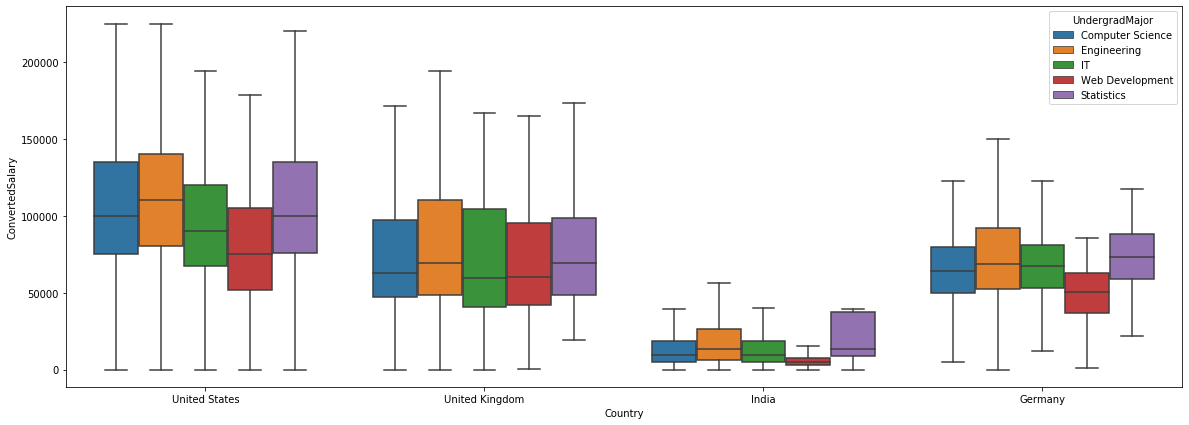

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))
sns.boxplot(x="Country",y="ConvertedSalary",hue='UndergradMajor',\
            data=top_4_df,\
            showfliers = False)

* From the above box plot, we see that, the overall median salary of US is the highest compared to the rest.
* The median salary reported by developers from India is very meagre compared to the rest.
* In all countries respondents with undergrad major as web-developement are getting paid the least. 


##### Managerial Insight

<div class="alert alert-block alert-info"> From our earlier findings, India has a large resource pool of entry level developers. Furthermore, we found out that the median salary in India is just a fraction compared to the other three countries.

With this insight, the managers can explore the below two options:

* If a company is trying to open an offshore development centre, India can be a viable option because of the lower median salary.


* The companies can outsource their projects to India and get it done at a significantly lower cost. 
</div>

### Finding 3: Respondents from India prefer "transportation benefits" over "retirement benefits"

From our earlier findings, India is a viable option to outsource/opening offshore developement center with its large resource pool and lower median salary compared to US,UK, and Germany. 
Let's now move ahead to see what are the Employement Benefits that Indian developers assess for a prospective job opportunity.

We would be comparing India vs United States, as most of the multinational companies in India have head quarters in the US.

The survey asked the responders to rate the aspect's such as **'Salary/Bonuses', 'Stock Options','Health Insurance','Parental Leave','Fitness/Wellness Benefit','Retirement/Pension Savings','Meal/Snacks','Computer/Office Equipment Benefit',
        'Childcare Benefit','Transportation Benefit','Conference/Education Benefit'** in a job's benefit package, that they look at while assessing a job opportunity.
        
The ranking is from 1 to 11, with **1** being the **most important** and **11** being the **least**.


###### Performing aggregate functions to calculate the priority. 

The below line of code extracts the data containing India and the US in country column and groups the data by country, to perform aggregate function of finding the mean of each column. 

We perform mean because we know that the lower limit is 1 and the upper limit is 11, in these columns. So a mean value closer to one would be ranked the highest and a mean value closer to 11 would be ranked the least.


In [67]:
#dataframe to extract data and grouping by country to perfrom aggregate function mean on Benefits columns. 
result_benefits = df[((df.Country == 'United States')|(df.Country == 'India'))&(df['Salary/Bonuses'].notna())]\
   .groupby('Country',as_index = False).agg({
        'Salary/Bonuses' : 'mean','Stock Options':'mean','Health Insurance':'mean','Parental Leave':'mean',
        'Fitness/Wellness Benefit':'mean','Retirement/Pension Savings':'mean','Meal/Snacks':'mean',
    'Computer/Office Equipment Benefit':'mean',
        'Childcare Benefit':'mean','Transportation Benefit':'mean','Conference/Education Benefit':'mean'})\
.rename(columns = {'Country':'Benefits'})

In [68]:
result_benefits = result_benefits.set_index('Benefits')

In [69]:
result_benefits

,Salary/Bonuses,Stock Options,Health Insurance,Parental Leave,Fitness/Wellness Benefit,Retirement/Pension Savings,Meal/Snacks,Computer/Office Equipment Benefit,Childcare Benefit,Transportation Benefit,Conference/Education Benefit
Benefits,,,,,,,,,,,
India,2.191486,5.978941,4.987365,7.070698,6.357551,6.857401,6.489471,5.942238,7.388989,6.084386,6.651474
United States,1.496959,5.348498,3.052211,7.823533,7.408820,4.293626,7.589279,6.300342,8.417121,7.845900,6.423421


The above table doesn't give a good visualization of the data in a table format.

Hence, we transpose the table to display the benefits column as a row and the country as column. Then ranking the values of each benefits from 1 to 11 with 1 being the highest priority.

In [70]:
ranking_benefits=result_benefits.transpose().rank().sort_values(by=['India','United States'],ascending=[True,True]).\
rename(columns = {'Country':'Benefits','India':'Rank_India','United States':'Rank_US'})

In [71]:
ranking_benefits

Benefits,Rank_India,Rank_US
Salary/Bonuses,1.0,1.0
Health Insurance,2.0,2.0
Computer/Office Equipment Benefit,3.0,5.0
Stock Options,4.0,4.0
Transportation Benefit,5.0,10.0
Fitness/Wellness Benefit,6.0,7.0
Meal/Snacks,7.0,8.0
Conference/Education Benefit,8.0,6.0
Retirement/Pension Savings,9.0,3.0
Parental Leave,10.0,9.0


##### Analysis: 

<div class="alert alert-block alert-info"> 
    
* As we see from the table above, respondents from India prefer on immediate benefits, whereas respondents from the US focus on future benefits as well.

* Indian responders value the transportation benefits more compared to retirement benefits. This could be attributed to the fact that transportation cost in India is costlier than US.
</div>

## Visualizing the above finding using Slopegraph

findfont: Font family ['GillSans'] not found. Falling back to DejaVu Sans.


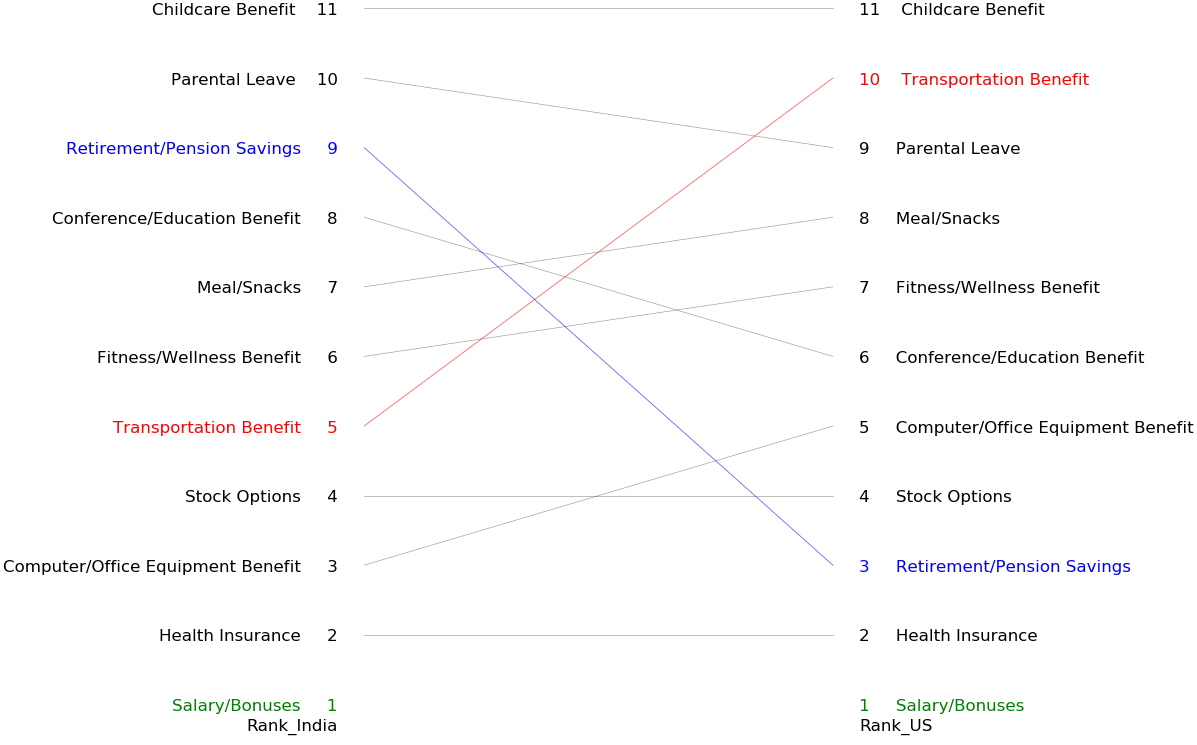

In [72]:
color  = {"Retirement/Pension Savings":'b','Transportation Benefit':'r','Salary/Bonuses':'green'}
plot_slope = slope(ranking_benefits,kind='interval',height= 25,width=40,font_size=40,dpi=300,savename='EU_interval.png',\
                  color=color)

The above slopegraph, clearly shows a large slope between the benefits preference for Transportation and Retirement between India and the US.
We could conclude that, with others aspects being alike, Indian developers value transportation benefits to retirement benefits. 

##### Managerial Insight

<div class="alert alert-block alert-info"> 

* We see that respondents from India focus only on Immediate benefits whereas repsondents from the US focus on future benefits.


* Also, Indians prioritizing the transportation benefits clearly indicates how costly the transportation is in India.


* If a Multinational Company plans on hiring an Indian employee, they could lure the candidate into joining them by giving them increased Transportation Benefit and lowering Retirement Benefit.


* This would reduce the cost of hiring for the company, as accomodating more retirement benefits is a greater cost to the company compared to transportation benefit. </div> 

### Additional Findings:

#### A minor portion of the US developers have assessed Salary/Bonus as not their top priority.

Every developer has rated Salary/Bonuses as their top priority. We wanted to dig deeper to see if there are people for whom salary/Bonus benefit is not a priority.

To check this, creating a new column to classify developers who have rated Salary/Bonus between 1-7 as groups for whom Salary is a priority and the rest as groups for whom Salary/Bonus is not a priority.

In [73]:
#creating a column for assess benefit 1Creating a new column for: Grouping Assess Benefits1 into 2 categories
df['AssessBenefits1_classification'] = df['Salary/Bonuses'].apply(lambda x: 'Salary/Bonus priority' if x <7 \
                                                          else 'Salary/Bonus not priority' if x >= 7 \
                                                          else 'Not_Answered')

##### Performing aggregation by the groups split above to see how many developers are in each category.

In [74]:
#Dataframe to show the number of people united states for whome salary/bonus is priority
AssessBenefit_US = df[(df.Country == 'United States') & (df.AssessBenefits1_classification != 'Not_Answered')]\
                                     .groupby(['Country', 'AssessBenefits1_classification'])\
                                     .agg({'AssessBenefits1_classification':'count'})\
                                     .rename(columns = {'AssessBenefits1_classification':'count'}).reset_index()

AssessBenefit_US

,Country,AssessBenefits1_classification,count
0,United States,Salary/Bonus not priority,271
1,United States,Salary/Bonus priority,15511


From above, we see that only 1% of the total developers from the US have assessed a job opportunity on the basis of other benefits and not salary.

Though a minority of group have said Salary benefit is not their priority, let's understand, why?

In [75]:
US = df[(df.Country == 'United States') & (df.AssessBenefits1_classification != 'Not_Answered')]
US.groupby(['AssessBenefits1_classification'], as_index = False)\
                                              .agg({'YearsCodingProf':lambda x:x.value_counts().index[0],\
                                              'DevType':lambda x:x.value_counts().index[0]})

,AssessBenefits1_classification,YearsCodingProf,DevType
0,Salary/Bonus not priority,0-5 years,Student
1,Salary/Bonus priority,0-5 years,Full-stack developer


From the above table, we see that **minority** of respondents for whom **Salary/Bonus** is not the top priority are students with work experience less than five years. This could be because students might be interested to find a job in their prefered career path as opposed to a high paying job.

## Visualizing the above finding against India

In [76]:
US_Salaries =(df[(((df.Country == 'United States')|(df.Country == 'India'))&(df.AssessBenefits1_classification!='Not_Answered'))]\
                   .groupby(['Country','AssessBenefits1_classification']).agg({'ConvertedSalary':'median'})\
                   .sort_values('ConvertedSalary', ascending = False))\
                   .reset_index().rename(columns = {'AssessBenefits1_classification':'Benefits'})       

In [77]:
import plotly.express as px
fig = px.scatter(US_Salaries, x="Country", y="ConvertedSalary", color="Benefits",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl", size=[80,80,80,80])

fig.show()

### Challenge in this finding: 

It was interesting to explore on this topic, but due to insufficient data, we couldn't conclude our finding.


### References

We used the below links to help us with the visualizations in this notebook:

1) https://github.com/pascal-schetelat/Slope

2) https://matplotlib.org/tutorials/colors/colormaps.html#palettable

3) https://python-graph-gallery.com/

###### **Disclaimer**  :  The analysis and findings in this notebook are based on the responders of the StackOverflow survey and doesn't represent the general population. 